## Implementing XGBoost 


## Step 1: Import Libraries

In [11]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.datasets import load_diabetes

##  **XGBoost for Machine Learning**

###  **Imported Libraries**
- `xgboost` → High-performance gradient boosting framework.  
- `pandas` & `numpy` → Data handling & numerical computations.  
- `matplotlib.pyplot` → Visualization.  
- `sklearn.model_selection` → Train-test splitting & cross-validation.  
- `sklearn.metrics` → Performance evaluation (MSE, accuracy).  
- `sklearn.datasets` → Example dataset (Diabetes dataset).  


## Step 2: Load Dataset

## 📊 **Diabetes Dataset Preprocessing**

### 📥 **Loading the Dataset**
- **Source**: `sklearn.datasets.load_diabetes()`
- **Features**: 10 numerical attributes related to diabetes progression.
- **Target**: A continuous value representing disease progression.


In [12]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['TARGET'] = data.target
X = df.drop(columns=['TARGET'])
y = df['TARGET']


### 🔄 **Data Preparation**
- Created a **DataFrame** from the dataset.  
- **Features (`X`)**: All columns except `TARGET`.  
- **Target (`y`)**: The `TARGET` column representing the prediction goal.

## Step 3: Train-Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ✂️ **Splitting the Dataset**

### 🔹 **Train-Test Split**
- **Training Set**: 80% of the data.
- **Test Set**: 20% of the data.
- **Random State**: 42 (for reproducibility).

📌 The dataset is now divided into:
- `X_train`, `X_test` → Feature sets for training & testing.
- `y_train`, `y_test` → Corresponding target values.


## Step 4: Train XGBoost Model

## 🚀 **Training the XGBoost Regressor**  

### ⚙️ **Model Configuration**
- **Algorithm**: XGBoost Regressor  
- **Number of Estimators**: 200 (trees in the ensemble)  
- **Learning Rate**: 0.05 (controls step size in optimization)  
- **Max Depth**: 4 (limits tree depth to prevent overfitting)  
- **Random State**: 42 (ensures reproducibility) 

In [15]:
model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

 

### 🎯 **Training Process**
- The model is trained on the **training dataset (`X_train`, `y_train`)**.  
- XGBoost optimizes the **Mean Squared Error (MSE)** to minimize prediction error. 

## Step 5: Make Predictions

## 📊 **Evaluating the XGBoost Model**  

### 📝 **Performance Metric: Mean Squared Error (MSE)**
- The model makes predictions on the **test dataset (`X_test`)**.  
- The **Mean Squared Error (MSE)** is computed to measure the average squared difference between actual and predicted values.  
- **Lower MSE** indicates better model performance.  

In [16]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3247.3455585248703




### 📌 **Computed MSE**
- **Mean Squared Error:** `{mse}` (computed dynamically during execution)  


## Step 6: Feature Importance

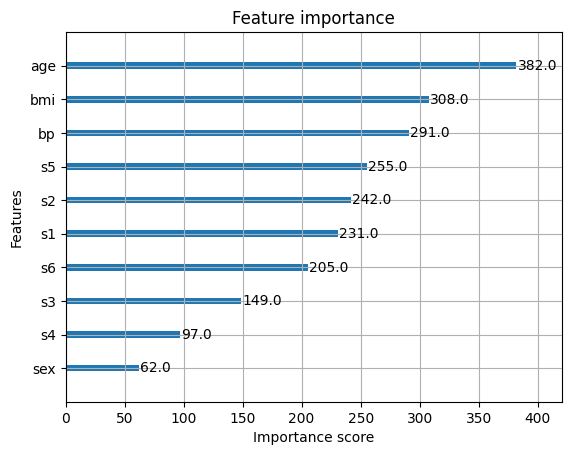

In [8]:
xgb.plot_importance(model)
plt.show()

## 🔥 **Feature Importance in XGBoost**  

### 📊 **Visualizing Feature Importance**
- XGBoost provides a **feature importance plot** to show which features contribute the most to predictions.  
- Features with **higher importance scores** have a greater impact on model decisions.  
- The importance is based on **how often** a feature is used in trees and how much it improves the model’s performance.  

### 📌 **Interpretation**
- The plot helps in **feature selection**, allowing us to remove less relevant features.  
- Features at the **top of the plot** are the most influential in predicting the target variable.  

**🔍 Insight:** Identifying key features can improve model performance and reduce complexity.

## Step 7: Cross-Validation

In [9]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-scores.mean()}")

Cross-Validation MSE: 3645.5648925377536


## 🎯 **Cross-Validation for Model Evaluation**  

### 🔄 **Cross-Validation (CV) Process**
- **5-Fold Cross-Validation** is used to assess model performance across different data splits.  
- The dataset is divided into **5 subsets**, and the model is trained on **4 subsets** while tested on the remaining **1 subset** in each iteration.  
- This process repeats **5 times**, ensuring a robust evaluation of model performance.  

### 📊 **Mean Squared Error (MSE)**
- The **Negative Mean Squared Error (MSE)** is computed for each fold.  
- The final **CV MSE** is the **average of all 5 folds**, providing a more reliable estimate of model generalization.  

**🔍 Insight:** Lower MSE values indicate **better model performance** with minimal overfitting.  


## Hyperparameter Tuning for XGBoost

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

xgb_model = xgb.XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


## 🔍 **Hyperparameter Tuning with Grid Search**  

### ⚙️ **Grid Search Process**  
- **Exhaustive Search**: Evaluates multiple hyperparameter combinations to find the best-performing model.  
- **Cross-Validation (CV)**: Uses **3-fold CV** to ensure **robust evaluation** of each combination.  
- **Scoring Metric**: **Negative Mean Squared Error (MSE)** is used to rank models (lower is better).  

### 🔢 **Hyperparameter Grid**  
| Parameter      | Values Tested         |
|---------------|-----------------------|
| `max_depth`   | [3, 5, 7]              |
| `learning_rate` | [0.01, 0.1, 0.2]    |
| `n_estimators` | [100, 200, 300]      |

### 🏆 **Best Parameters Found**
- After evaluating all possible combinations, **GridSearchCV** selects the optimal hyperparameters to **minimize MSE**.  
- The final **best model** is displayed, ensuring the highest predictive accuracy.  
